# Sparkling Diwali Sales: Uncovering Growth Opportunities with Data-driven Analysis and Visualization

In [69]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# load Diwali data set
df = pd.read_csv('Diwali.csv', encoding='unicode_escape')

In [71]:
df.shape

(11251, 15)

In [72]:
# SHow data set only 5 rows
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [73]:
# information of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [74]:
# Drop unnamed and Status column
df.drop(['unnamed1', 'Status'], axis=1, inplace=True)

In [75]:
# Check null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [76]:
# Drop null values
df.dropna(inplace=True)

In [77]:
# Check unique values
df.nunique()

User_ID             3752
Cust_name           1250
Product_ID          2350
Gender                 2
Age Group              7
Age                   81
Marital_Status         2
State                 16
Zone                   5
Occupation            15
Product_Category      18
Orders                 4
Amount              6584
dtype: int64

In [78]:
# check duplicated values
df.duplicated().sum()

8

In [79]:
# drop duplicated values
df.drop_duplicates(inplace=True)

In [80]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123100e+04,11231.000000,11231.000000,11231.000000,11231.000000
mean,1.003004e+06,35.411985,0.419998,2.489093,9454.084982
std,1.716055e+03,12.756116,0.493580,1.114880,5221.728776
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004428e+06,43.000000,1.000000,3.000000,12677.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [81]:
df.describe(include='object')

,Cust_name,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11231,11231,11231,11231,11231,11231,11231,11231
unique,1250,2350,2,7,16,5,15,18
top,Vishakha,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,42,53,7828,4536,1942,4287,1581,2653


In [82]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [83]:
# Change datatype amount column
df['Amount'] = df['Amount'].astype(int)

In [84]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

## Exploritory Data Analyst

In [85]:
# show count ploat gender column
df['Gender'].value_counts()

Gender
F    7828
M    3403
Name: count, dtype: int64

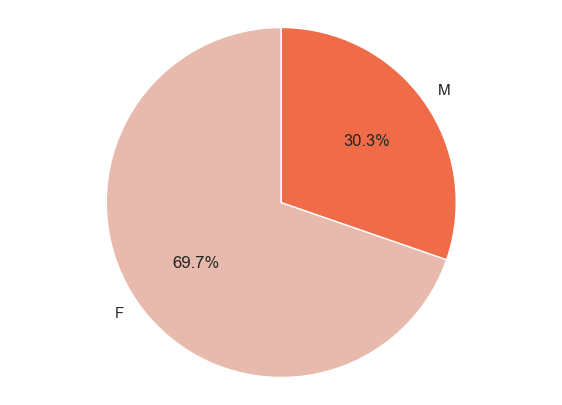

In [149]:
gender_colors = ['#e8baae', '#f06b48']
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(7, 5))
ax1 = plt.gca()
ax1.set_facecolor('#c4ebf2')
ax1.grid(False)

ax1.pie(gender_counts, labels=gender_counts.index, colors=gender_colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

- This visual representation of the data reveals that there are more females than males in the population.

In [87]:
# plotting a bar chart for gender vs total amount
sales_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

In [88]:
sales_gender

,Gender,Amount
0,F,74307679
1,M,31871146


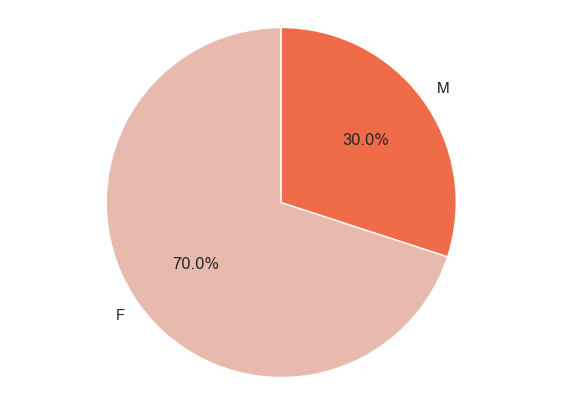

In [150]:
gender_colors = ['#e8baae', '#f06b48']
gender_amounts = sales_gender['Amount']

plt.figure(figsize=(7, 5))
ax2 = plt.gca()
ax2.set_facecolor('#c4ebf2')
ax2.grid(False)

ax2.pie(gender_amounts, labels=sales_gender['Gender'], colors=gender_colors, autopct='%1.1f%%', startangle=90)
ax2.axis('equal')

plt.show()


- The graphical representation suggests that a higher proportion of females tend to be the buyers, indicating their strong presence in the market. Additionally, it appears that the purchasing power of females is higher than that of males, as they seem to have made more purchases overall.

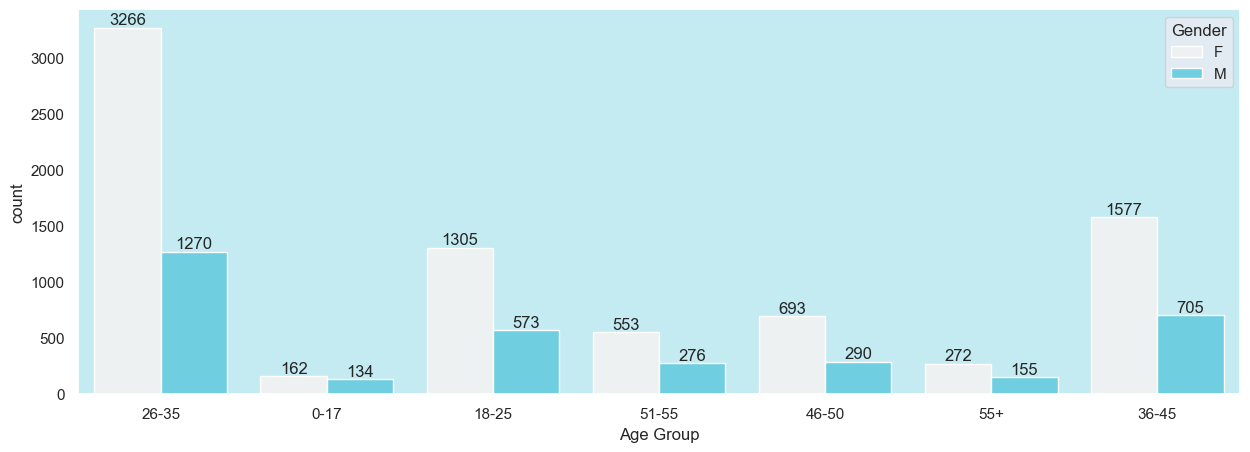

In [90]:
sns.set(rc={'figure.figsize':(15,5)})
ax3 = sns.countplot(data = df, x = 'Age Group', hue = 'Gender', color='#5cdbf2')
sns.set(rc={'figure.figsize':(20,5)})
ax3.grid(False)
ax3.set_facecolor('#c4ebf2')

for bars in ax3.containers:
    ax3.bar_label(bars)

In [91]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(5)
sales_age


,Age Group,Amount
2,26-35,42581767
3,36-45,22135135
1,18-25,17235530
4,46-50,9207844
5,51-55,8237909


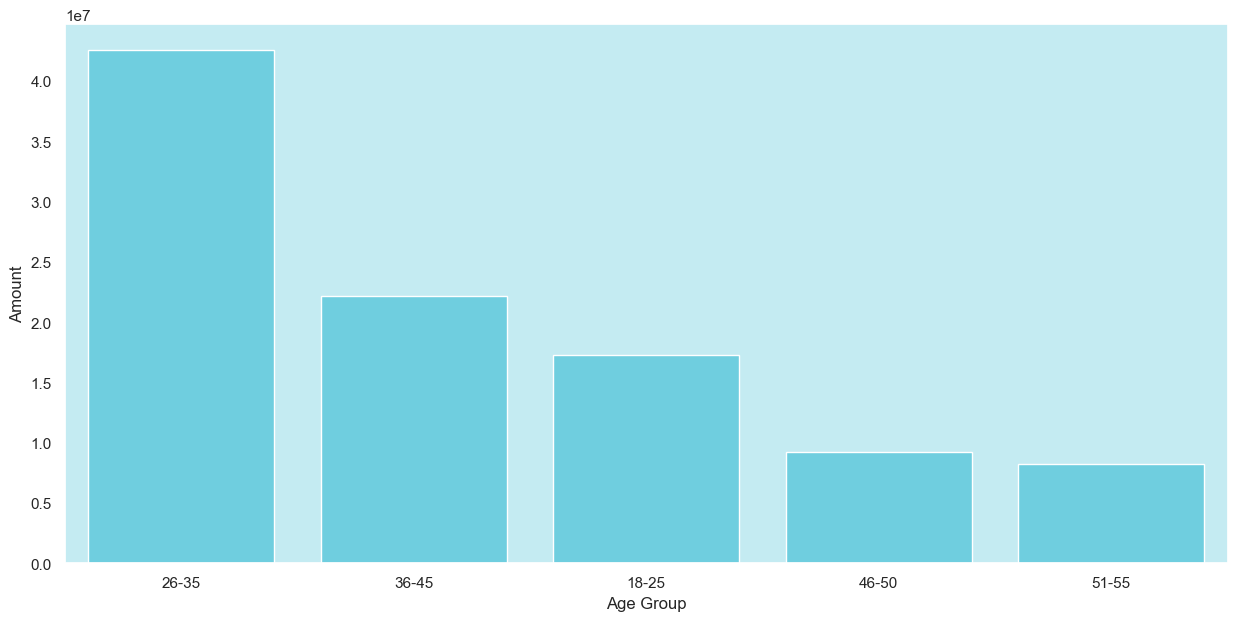

In [92]:
# plot bar
sns.set(rc={'figure.figsize':(15,7)})
ax4 = sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, color='#5cdbf2')
ax4.grid(False)
ax4.set_facecolor('#c4ebf2')


- The graphical analysis reveals that the majority of buyers fall within the age group of 26-35 years, particularly among females. This age range demonstrates the highest purchasing activity, with a substantial amount of transactions recorded. It is noteworthy that the age groups of 36-45 years and 18-25 years also contribute significantly to the overall sales, followed by the age groups of 46-50 years and 51-55 years. However, it is the 26-35 years female demographic that stands out as the most prominent consumer segment based on the provided data.

In [93]:
# total number of orders from top 10 states
sales_order = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)



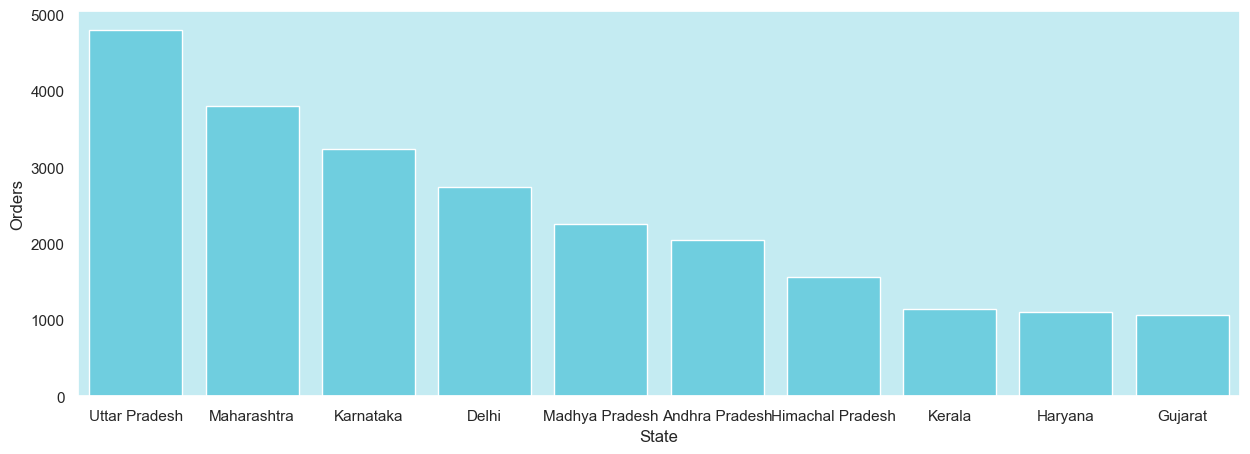

In [101]:
sns.set(rc={'figure.figsize':(20,10)})
ax6 = sns.set(rc={'figure.figsize':(15,5)})
ax6 = sns.barplot(data = sales_order, x = 'State',y= 'Orders',color='#5cdbf2')
ax6.grid(False)
ax6.set_facecolor('#c4ebf2')



In [102]:
sales_amount = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

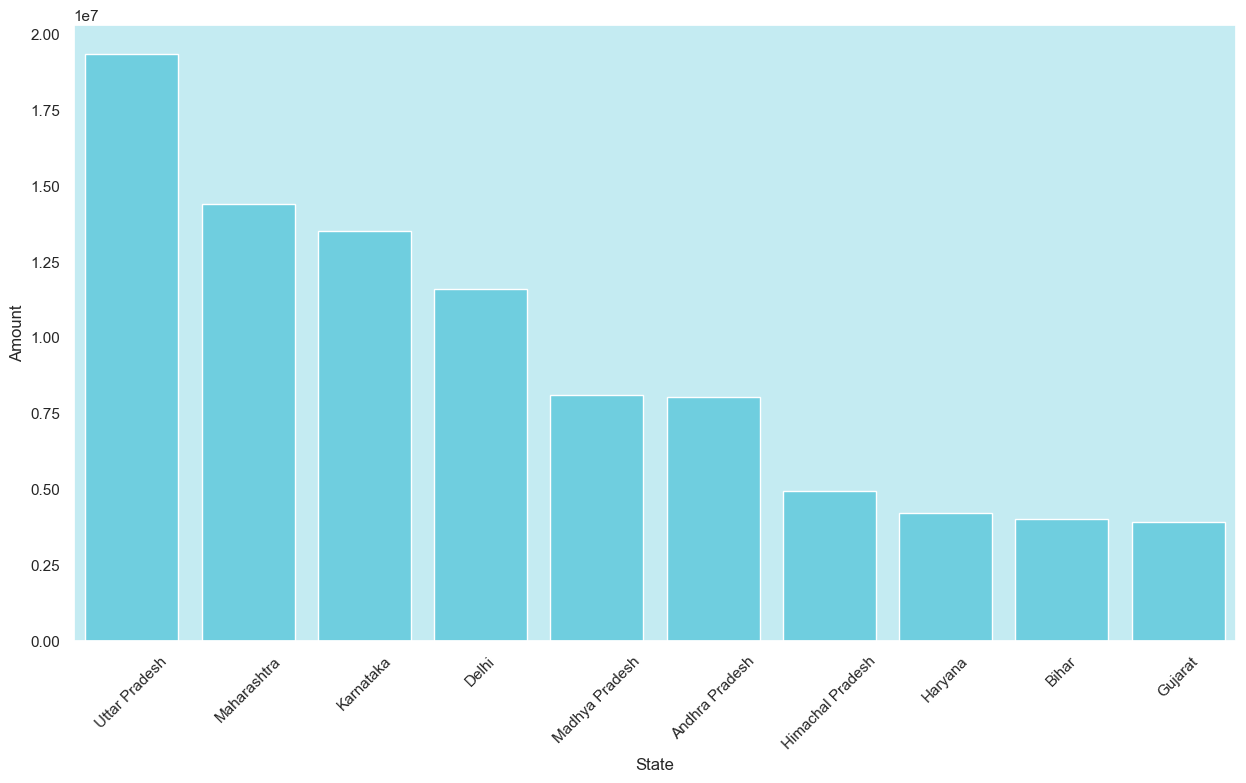

In [103]:
# plot bar
sns.set(rc={'figure.figsize':(15,8)})
ax5 = sns.barplot(x = 'State',y= 'Amount' ,data = sales_state, color='#5cdbf2')
ax5.grid(False)
ax5.set_facecolor('#c4ebf2')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45)
plt.show()


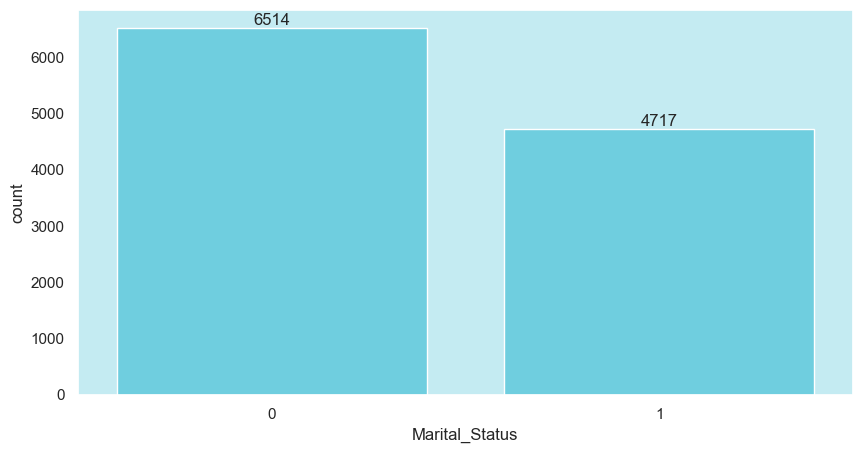

In [105]:
ax7 = sns.countplot(data = df, x = 'Marital_Status', color='#5cdbf2')
ax7.grid(False)
ax7.set_facecolor('#c4ebf2')
sns.set(rc={'figure.figsize':(5,2)})
for bars in ax7.containers:
    ax7.bar_label(bars)

In [114]:
sales_mar = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_mar

,Marital_Status,Gender,Amount
0,0,F,43778558
2,1,F,30529121
1,0,M,18320176
3,1,M,13550970


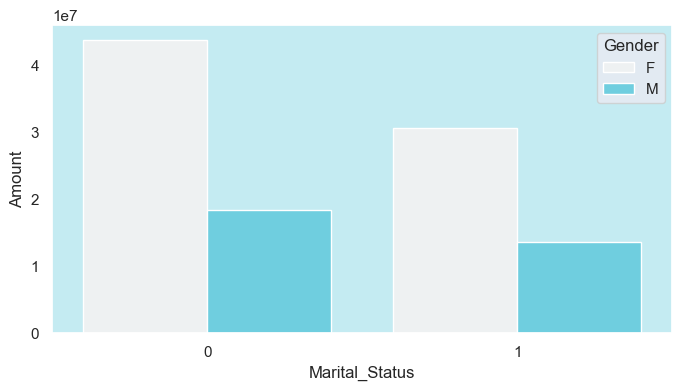

In [115]:
ax8=sns.set(rc={'figure.figsize':(8,4)})
ax8=sns.barplot(data = sales_mar, x = 'Marital_Status',y= 'Amount', hue='Gender', color='#5cdbf2')
ax8.grid(False)
ax8.set_facecolor('#c4ebf2')
plt.show()


- The visual analysis clearly indicates that the majority of buyers are married women, suggesting their significant presence in the consumer market. Furthermore, it is evident that these married women exhibit a higher purchasing power compared to other demographic segments. This finding highlights the influential role of married women as key consumers, emphasizing their impact on the overall sales and market dynamics.

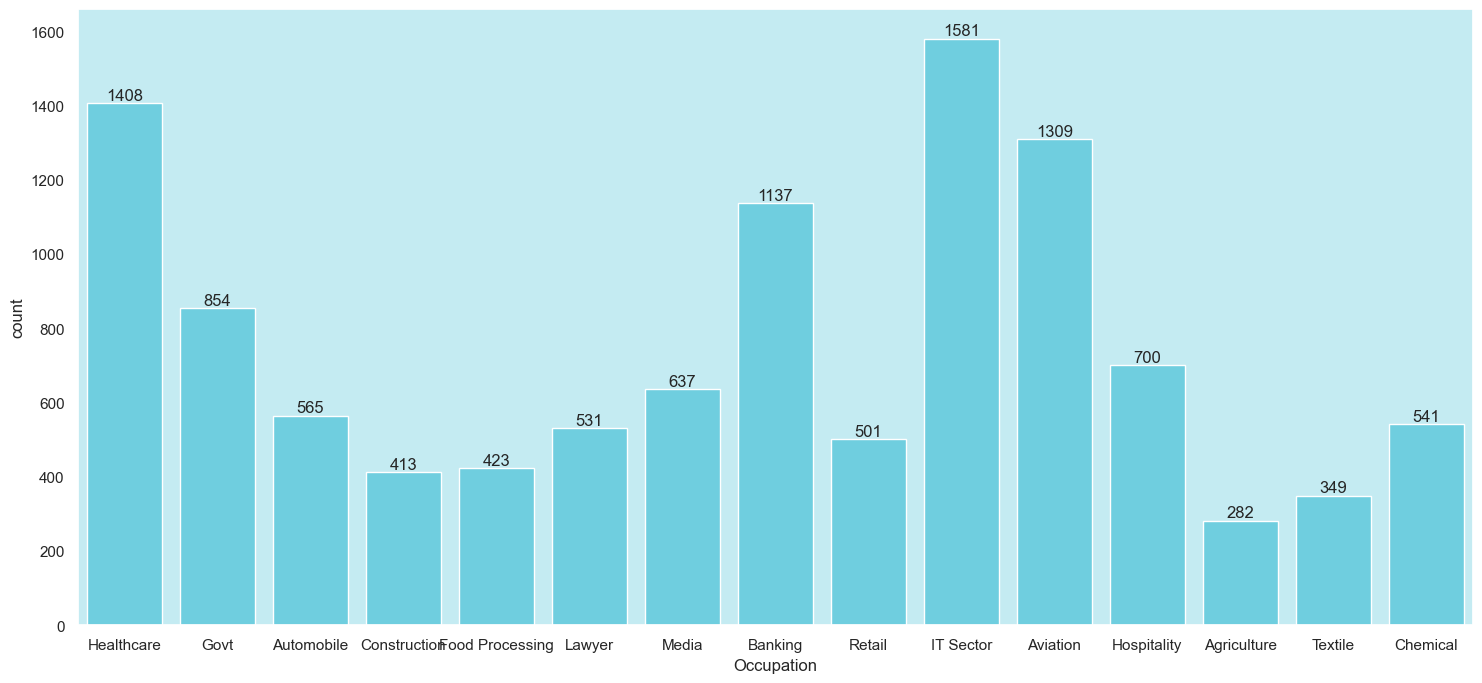

In [116]:
sns.set(rc={'figure.figsize':(18,8)})
ax9 = sns.countplot(data = df, x = 'Occupation', color='#5cdbf2')
ax9.grid(False)
ax9.set_facecolor('#c4ebf2')

for bars in ax9.containers:
    ax9.bar_label(bars)

In [117]:
sales_occu = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
sales_occu

,Occupation,Amount
10,IT Sector,14741862
8,Healthcare,13034586
2,Aviation,12599994
3,Banking,10770610
7,Govt,8517212


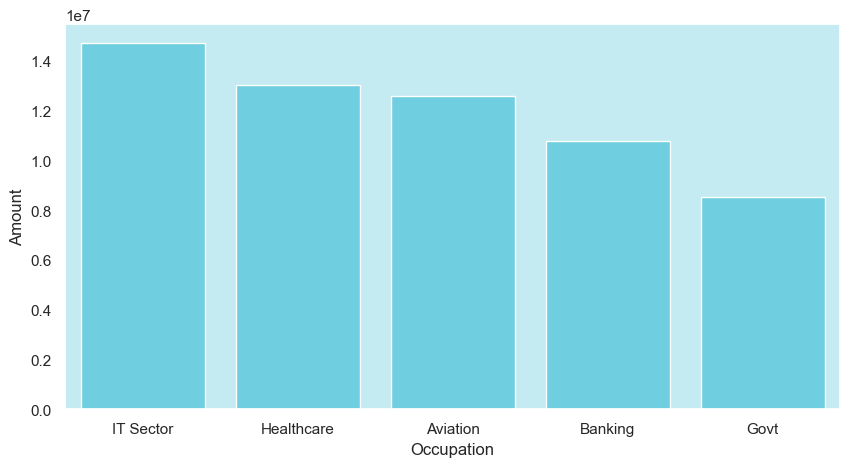

In [120]:
# plot bar
ax10=sns.set(rc={'figure.figsize':(10,5)})
ax10=sns.barplot(data = sales_occu, x = 'Occupation',y= 'Amount', color='#5cdbf2')
ax10.grid(False)
ax10.set_facecolor('#c4ebf2')


- The graphs highlight that the IT, healthcare, and aviation sectors have the highest number of buyers, indicating a substantial presence of professionals from these fields in the consumer market.
- The data strongly suggests that individuals working in these sectors significantly contribute to sales and overall market activity.
- The prominence of the IT, healthcare, and aviation sectors in terms of buyer representation emphasizes the influence and purchasing power of professionals employed in these industries.
- Professionals from the IT sector, healthcare sector, and aviation sector play a crucial role in driving sales and shaping market trends during the analyzed period.
- The significant presence of buyers from these sectors underscores the importance of understanding the specific preferences and needs of professionals in the IT, healthcare, and aviation industries for effective marketing and business strategies.

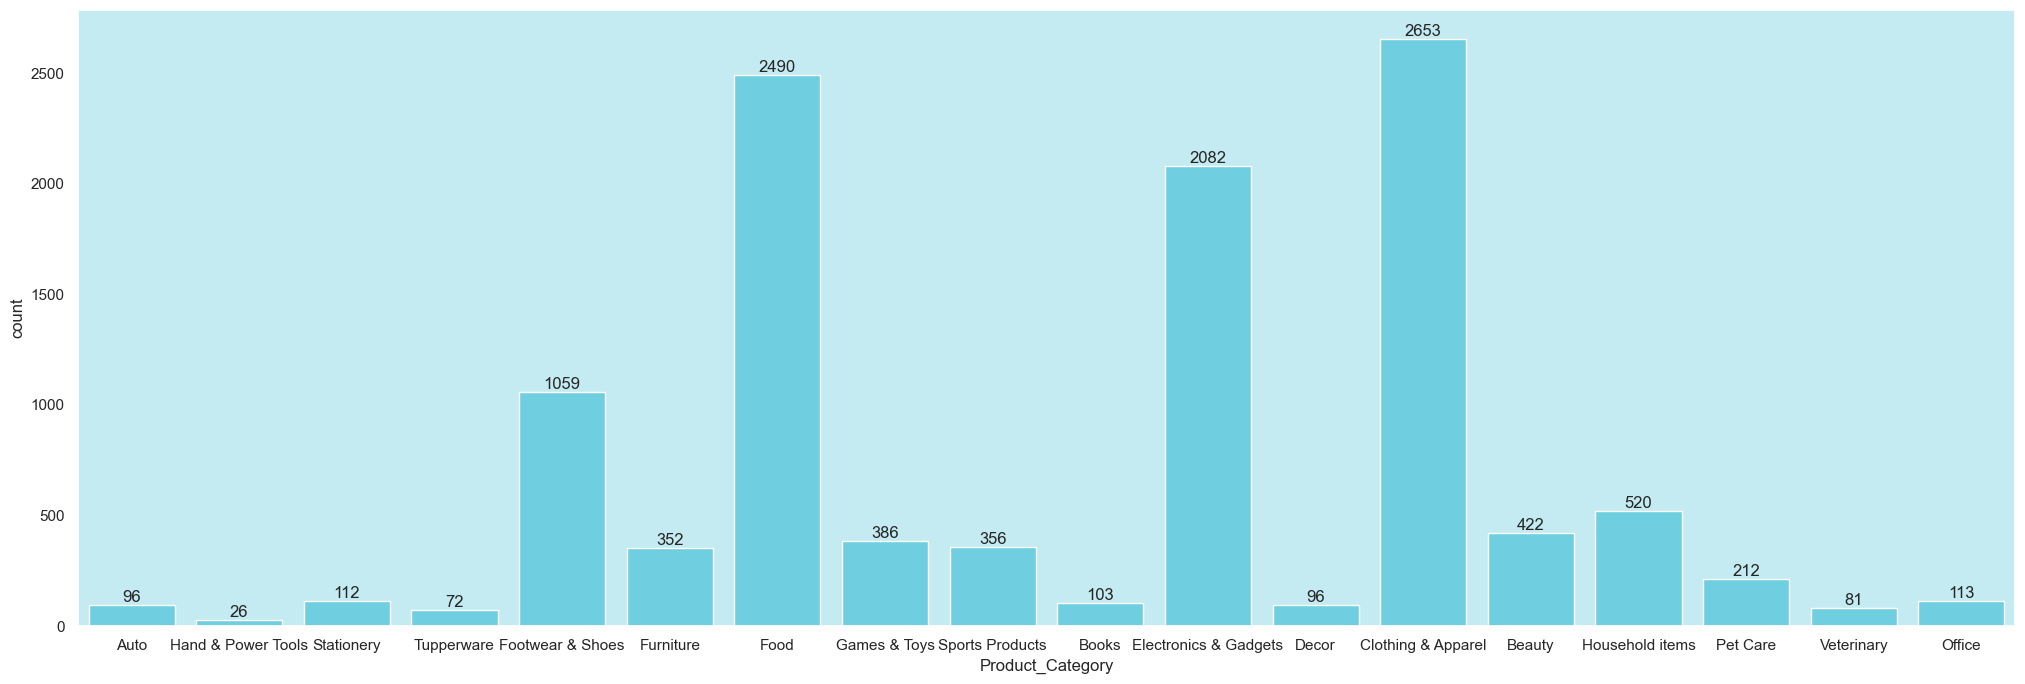

In [129]:
sns.set(rc={'figure.figsize':(25,8)})
ax11 = sns.countplot(data = df, x = 'Product_Category', color='#5cdbf2')

ax11.grid(False)
ax11.set_facecolor('#c4ebf2')
for bars in ax11.containers:
    ax11.bar_label(bars)

In [131]:
sales_pro = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
sales_pro

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16484472
5,Electronics & Gadgets,15607657
7,Footwear & Shoes,15575209
8,Furniture,5440051


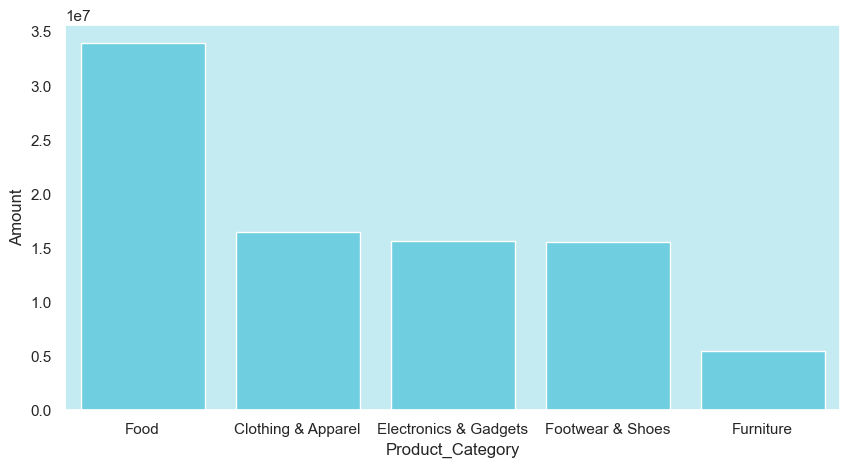

In [136]:

plt.figure(figsize=(10, 5))
sns.barplot(data=sales_pro, x='Product_Category', y='Amount', color='#5cdbf2')
plt.grid(False)
plt.gca().set_facecolor('#c4ebf2')

plt.show()

- The analysis of the graphs reveals that the majority of the sold products belong to the Food, Clothing, and Electronics categories. These categories stand out as the primary sources of sales, indicating a high demand for products in these sectors. The data highlights the significant presence of consumers purchasing items related to food, clothing, and electronics, underscoring their importance in the market. This insight suggests that businesses operating in these categories have a considerable opportunity to capitalize on consumer preferences and cater to their needs. Understanding the trends and dynamics within the Food, Clothing, and Electronics sectors becomes crucial for businesses aiming to optimize their sales strategies and meet customer expectations effectively.

In [140]:
sales_id = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

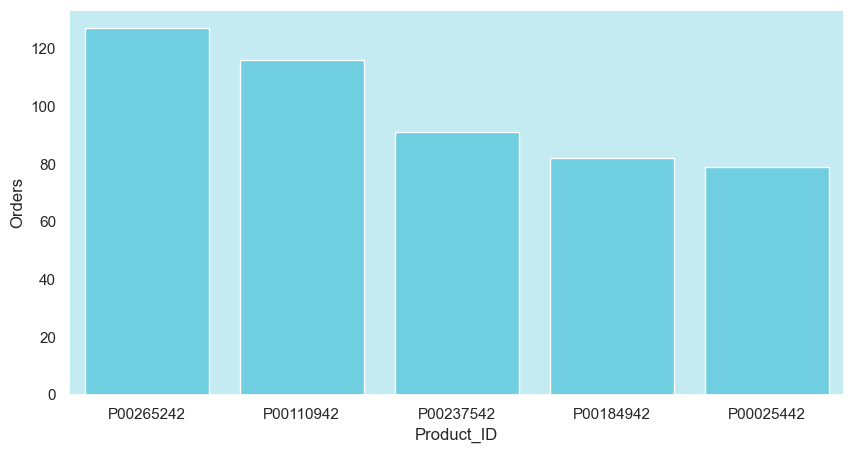

In [143]:
ax13=sns.set(rc={'figure.figsize':(10,5)})
ax13=sns.barplot(data = sales_id, x = 'Product_ID',y= 'Orders', color='#5cdbf2')
ax13.grid(False)
ax13.set_facecolor('#c4ebf2')

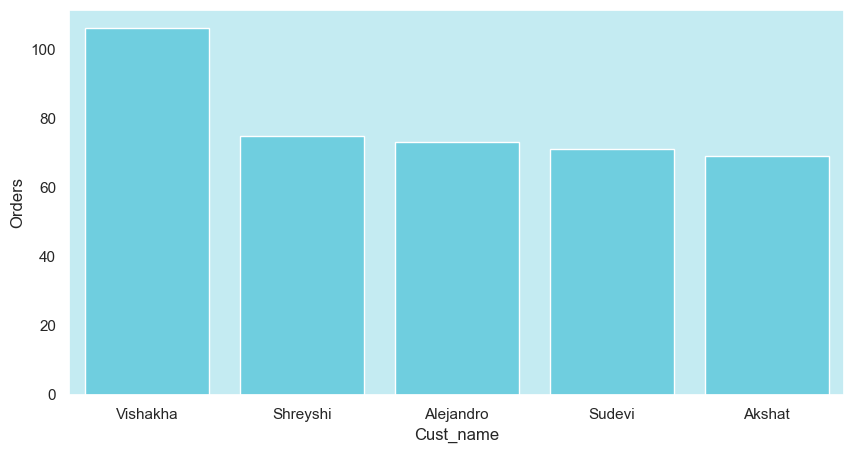

In [145]:
sales_cus = df.groupby(['Cust_name'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

ax14=sns.set(rc={'figure.figsize':(10,5)})
ax14=sns.barplot(data = sales_cus, x = 'Cust_name',y= 'Orders', color='#5cdbf2')
ax14.grid(False)
ax14.set_facecolor('#c4ebf2')

## Conclusion:
***To improve sales, the company should focus on targeted marketing campaigns for married women aged 26-35 years from Uttar Pradesh, Maharashtra, and Karnataka, working in IT, healthcare, and aviation sectors. Emphasize product assortment in Food, Clothing, and Electronics categories, enhance online presence, engage customers through personalized offers and excellent service, collaborate with industry influencers, and make data-driven decisions. By implementing these strategies, the company can effectively capture the attention and meet the needs of the target demographic, leading to improved sales and business growth***